In [9]:
# Load necessary libraries

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import re
import sys
from hashlib import sha1
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier

import matplotlib.pyplot as plt


In [2]:
store_data = pd.read_csv("B:YTé - Store Dataset 2023.csv", index_col=0)
store_data.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Operational_Cost,Customer_Age
0,02/01/2022,3686,3,Skirt,CZUZX,1.0,63.5,44.6,51
1,02/01/2022,3719,4,Skirt,549KK,1.0,55.9,41.1,27
2,02/01/2022,9200,5,Skirt,K8EHH,1.0,68.8,52.6,39
3,02/01/2022,1666,7,Shoes,AHZNS,1.0,82.1,56.7,39
4,02/01/2022,1253,8,Skirt,9STQJ,1.0,82.5,58.7,30


Text(0.5, 1.0, 'Age distribution')

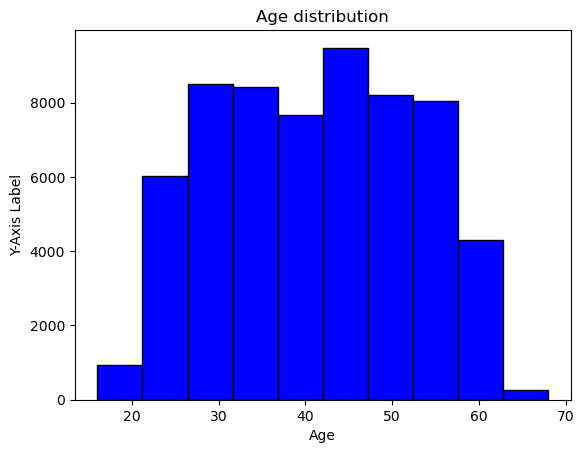

In [13]:
plt.hist(store_data['Customer_Age'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Y-Axis Label')
plt.title('Age distribution')

In [21]:
store_data['Gross_profit'] = store_data['Sales_Amount'] - store_data['Operational_Cost']
store_data['Date'] = pd.to_datetime(store_data['Date'], format='%d/%m/%Y', errors='coerce')

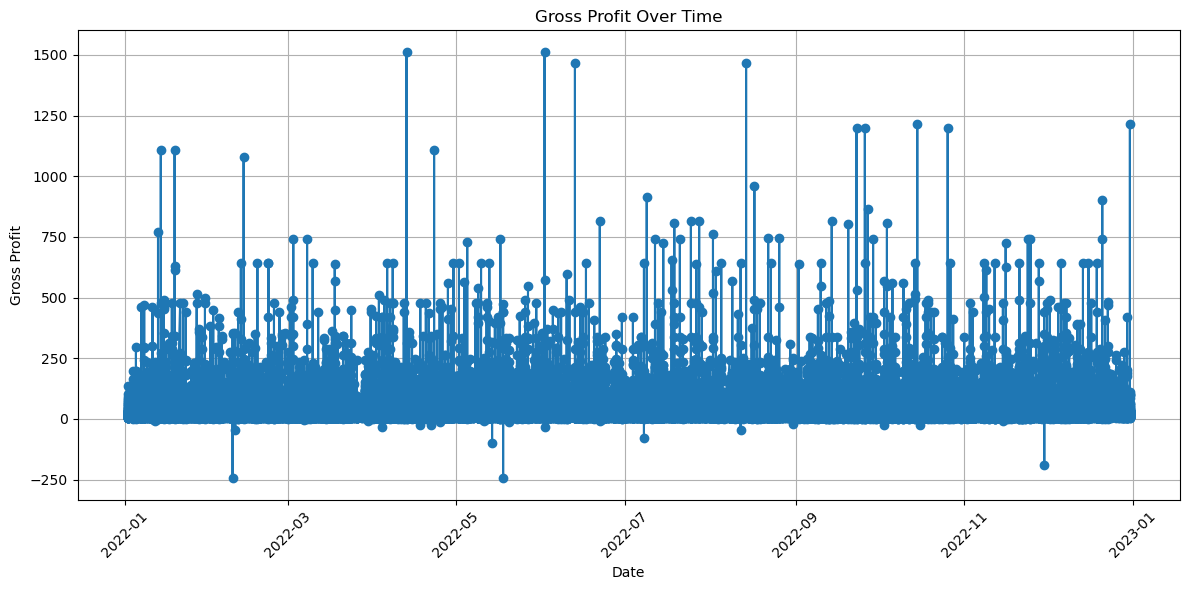

In [22]:
# Convert the 'Date' column to datetime
store_data['Date'] = pd.to_datetime(store_data['Date'], format='%d/%m/%Y')

# Sort the DataFrame by date (optional but recommended)
store_data.sort_values(by='Date', inplace=True)

# Plotting the data
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(store_data['Date'], store_data['Gross_profit'], marker='o', linestyle='-')
plt.title('Gross Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Gross Profit')
plt.grid(True)  # Add a grid for better readability

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Ensures labels are not cut off
plt.show()

In [23]:
clothing_type = store_data['SKU_Category'].unique()
print(clothing_type)

['Skirt' 'T-shirt' 'Shoes' 'Crop Top' 'Blazer' 'Cargo pants' 'Hoodie'
 'Dresses' 'Jeans' 'Trench coat' 'Hat' 'Dress shirt' 'Sunglasses'
 'Bomber jacket' 'Shorts']


In [25]:
skirt_data = store_data[store_data['SKU_Category'] == 'Skirt']

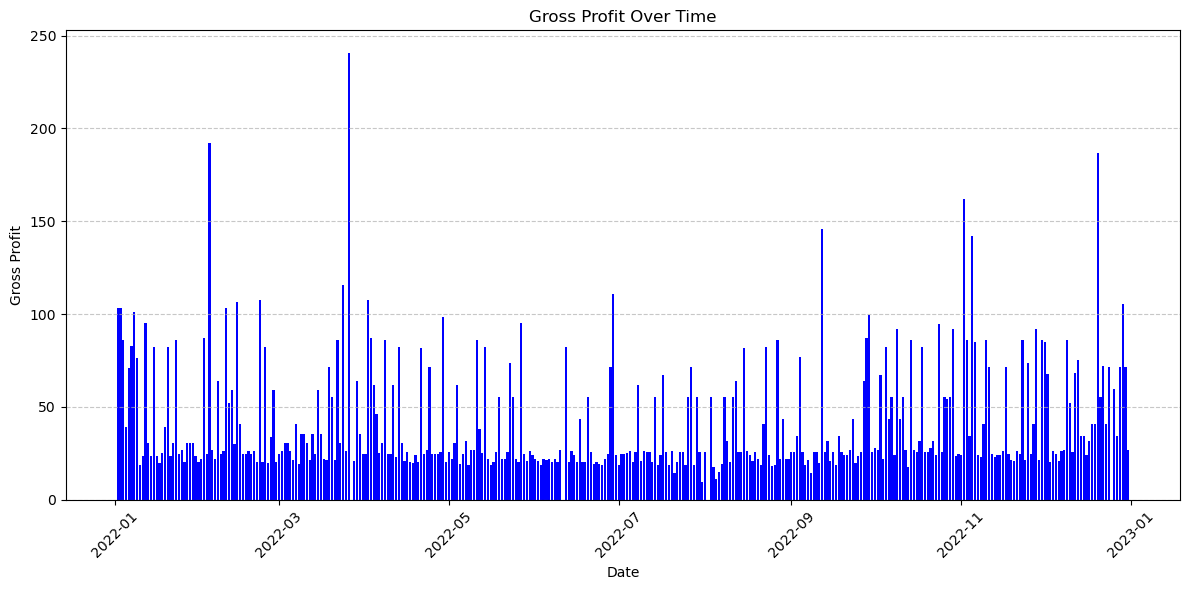

In [32]:
# Filter and save only rows with "Skirt" in the 'SKU_Category' column
skirt_data = store_data[store_data['SKU_Category'] == 'Skirt'].copy()

# Convert the 'Date' column to datetime (if not done already)
skirt_data['Date'] = pd.to_datetime(skirt_data['Date'], format='%d/%m/%Y')

# Sort the DataFrame by date (optional but recommended)
skirt_data.sort_values(by='Date', inplace=True)

# Plotting the data as a bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(skirt_data['Date'], skirt_data['Gross_profit'], color='blue')
plt.title('Gross Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Gross Profit')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid for better readability

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Ensures labels are not cut off
plt.show()


In [33]:

quarter_map = ["Q1","Q1","Q1","Q2","Q2","Q2","Q3","Q3","Q3","Q4","Q4","Q4"]
#               Jan, Feb, Mar, April....
def date_to_quarter(date: str) -> str:
  date_split = [int(x) for x in date.split("/")]
  day = date_split[0]
  month = date_split[1]
  year = date_split[2]
  quarter_name = quarter_map[month - 1]
  return "{0}, {1}".format(quarter_name, year)